## Workflow

1. [Prep Your Repo](#prep-your-repo)
2. [Import](#import)
2. [Acquire Data](#acquire-data)
3. [Clean, Prep & Split Data](#clean-prep-and-split-df)
5. [Explore Data](#explore-data)
    - [Hypothesis Testing](#hypothesis-testing)
6. [Identify Baseline](#identify-baseline)
7. [Modeling](#modeling)
    - [Train](#train)
    - [Validate](#validate)
    - [Test](#test)
8. [Predict on Test Model](#predict-on-test-model)
9. [Export Predictions to CSV](#export-predictions-to-csv)

___
# <a name="prep-your-repo"></a>1. Prep Your Repo
1. Create new repo and name it: 'classification_proj'
    - clone
2. Create .gitignore that includes env.py
    - push
3. Create env.py file that store MySQL login credentials to obtain TELCO data.
    - save
    - confirm it is ignored (git status)
4. Create README.md file to begin notating steps taken so far.
    - save
    - push
5. Create a Jupyter Lab environment to continue working in.
6. Create Jupyter Notebook to begin data pipeline: 'telco001'

___
# <a name="import"></a>2. Import 
Import all necessary libraries and functions. 

In [1]:
# pd & np libraries to make life easier
import pandas as pd
import numpy as np

# visualizers I'll be using
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from graphviz import Graph

# to perform stats tests
from scipy import stats

# all sklearn lib's functs I intend on using
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

# to view Zach's threshold graph
import logistic_regression_util

#import all functions created in acquire , prepare & explore
import prepare
import acquire
import explore
import model


# ignore warnings
import warnings
warnings.filterwarnings("ignore")

___
# <a name="acquire-data"></a>3. Acquire Data
Read `TELCO` data from sql

In [2]:
# read TELCO data from sql
df = acquire.get_telco_data()

df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check
3,1,1,1,0023-HGHWL,Male,1,No,No,1,No,...,No,No,No,Yes,25.1,25.1,Yes,Month-to-month,DSL,Electronic check
4,3,1,1,0032-PGELS,Female,0,Yes,Yes,1,No,...,No,No,No,No,30.5,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)


#### initial data summarization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [4]:
df.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


<AxesSubplot:xlabel='monthly_charges', ylabel='Density'>

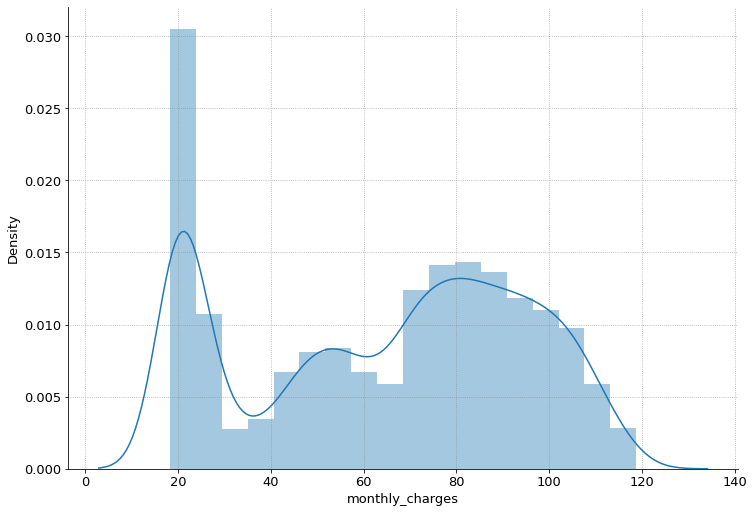

In [5]:
# Plot distributions of individual variables.
sns.distplot(df.monthly_charges)

ValueError: could not convert string to float: ''

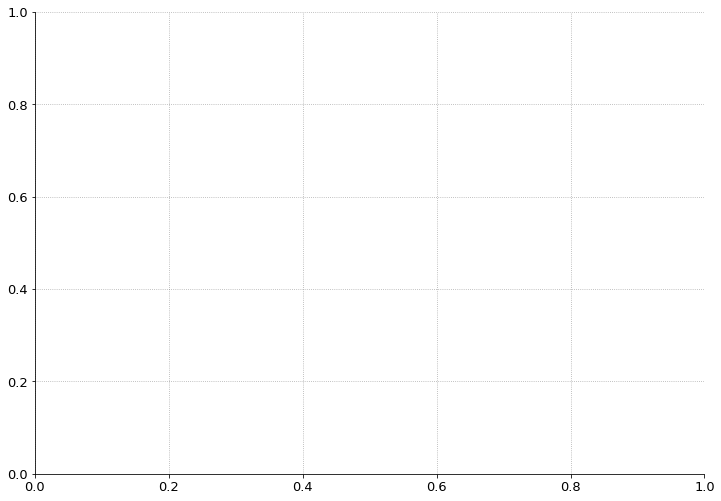

In [6]:
sns.distplot(df.total_charges)

It's here that I realize we have to
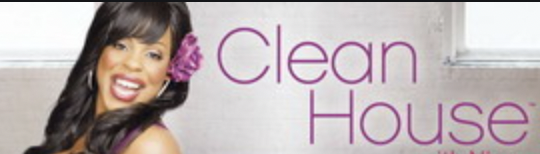 

# <a name="clean-prep-and-split-df"></a>4. Clean, Prep and Split `df`
Using three functions tied to eachother in `prepare.py` file:
- [`clean_telco()`](prepare.py)
- [`prep_telco()`](prepare.py)
- [`train_validate_test()`](prepare.py)

In [3]:
# test prep_telco & train_validate_test
train, validate, test = prepare.train_validate_test(df)

Verify size of splits

In [4]:
train.shape, validate.shape, test.shape

((3943, 34), (1691, 34), (1409, 34))

In [5]:
# look at the split df
train.head()

,customer_id,gender,senior_citizen,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,...,phone_multi_line,phone_sgl_line,sgl_dependents,sgl_no_dep,fam_house,stream_media,online_feats,auto_billpay,sen_int,sen_int_techsup
477,3969-JQABI,0,0,58,1,0,1,1,0,0,...,0,1,1,0,0,1,1,1,0,0
183,1600-DILPE,0,0,12,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2252,7359-SSBJK,0,1,64,1,0,1,1,0,1,...,0,1,0,1,0,1,1,1,1,1
5556,0883-EIBTI,0,0,2,1,0,3,3,3,3,...,0,1,0,1,0,1,1,0,0,0
3626,5519-NPHVG,0,0,12,1,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0


In [6]:
# view split df's columns/features
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 477 to 5742
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        3943 non-null   object 
 1   gender             3943 non-null   int64  
 2   senior_citizen     3943 non-null   int64  
 3   tenure             3943 non-null   int64  
 4   phone_service      3943 non-null   int64  
 5   multiple_lines     3943 non-null   int64  
 6   online_security    3943 non-null   int64  
 7   online_backup      3943 non-null   int64  
 8   device_protection  3943 non-null   int64  
 9   tech_support       3943 non-null   int64  
 10  paperless_billing  3943 non-null   int64  
 11  monthly_charges    3943 non-null   float64
 12  total_charges      3943 non-null   float64
 13  churn              3943 non-null   int64  
 14  pymt_type_abt      3943 non-null   uint8  
 15  pymt_type_acc      3943 non-null   uint8  
 16  pymt_type_echk     394

___
# <a name="explore-data"></a>5. Explore Data

### 5a. List all categorical & quantitative variables/features
`cat_vars = ['churn', 'gender', 'senior_citizen', 'fam_house', 'sgl_dependents', 'sgl_no_dep', 'phone_service', 'phone_multi_line', 'phone_sgl_line', 'intserv_dsl', 'intserv_fiber', 'online_feats', 'stream_media', 'device_protection', 'tech_support', 'paperless_billing', 'auto_billpay', 'pymt_type_echk', 'pymt_type_mchk', 'contract_1yr', 'contract_2yr', 'contract_m2m', 'sen_int', 'sen_int_techsup']`

`quant_vars = ['tenure', 'tenure_yrs', 'monthly_charges', 'total_charges']`
### 5b. Run exploratory stats functions on Uni-/Bi-/Multi-Variate data found in [`explore.py`](explore.py)

#### Univariate Key Takeaways:
- 74% of total customer base churned in past 72 months
- Only 16% of customers are elderly
- 56% of internet customers are Fiber
    - 64% of internet customers DON'T use tech support
- 45% of customers are enrolled in auto billpay
    - majority 33% of all customers pay using echecks
- 55% of customers are Month-to-Month

#### Bivariate Key Takeaways:
- seniors churn at a higher rate (40%)
    - although they are a MUCH smaller fraction of total customers.
    - 42% seniors with internet churned
    - 7% total churn
- internet: has very low p-values
    - 41% of Fiber customer churn, 18% total customer
    - 21% of churned cust did NOT use tech support
- billpay: has a very low p-value
    - 36% of non billpay customer churned, 20% of total customers
        - 55% total customer do NOT use billpay
    - 46% of e-payment customers churned, 15% of total customers
        - 33% of total customer use echeck
    - 21% of mailed check customers churned, 5% of total customers
        - 23% total customers mail checks
- contracts: 
    - 2% of 2yr customers churn 
        - 0.06% total, account for 24% of total customers
    - 11% of 1yr customers churn
        - 2.5% total, account for 22% of total customers
    - 43% of M2M customers churn
        - 24% total, account for 55% of total customers
- charges: 
    - as monthly charges increase(threshold approx $65) a larger amt of customers drop off

#### Multivariate Key Takeaways:
- Elderly churn at higher rates, although they are a significantly smaller population.
    - this happens within the first few months: are they confused/need tech help?
    - as monthly charges increase, so does their churn rate.
        
- Fiber customers are churning in droves, they are a larger population, this is a problem. 
    - for what seems to be high monthly charges.
    - most within the first year.
        
- High amount of non-billpayers churn within the first two years and steadily continue.
    - large amount non-billpayers monthly charges are low.
        -  so are the total charges because they churn within the first 20 months.
        
- Month-to-Month customers are also a large population churn.
    - for what seems to be high monthly charges.
    - Month-to-Month customers that stay have varying monthly charges.


___
# <a name="hypothesis-testing"></a>Hypothesis Testing

### Test: Elderly churn at higher rates.

In [13]:
null_hypothesis = "Elderly status and churn rates are INDEPENDENT."
alternative_hypothesis = "There is a relationship between elderly customers and whether they leave TELCO."
confidence_level = .99
a = 1 - confidence_level 

In [12]:
observed = pd.crosstab(train.senior_citizen, train.churn)
observed

churn,0,1
senior_citizen,,
0,2510,786
1,387,260


In [14]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < a:
    print(f"We reject the null hypothesis: {null_hypothesis}")
    print(f"Therefore: {alternative_hypothesis}")
else:
    print(f"We fail to reject the null, therefore: {null_hypothesis}")
p

We reject the null hypothesis: Elderly status and churn rates are INDEPENDENT.
Therefore: There is a relationship between elderly customers and whether they leave TELCO.


1.1501021801978583e-17

***
### Test: Fiber customers have higher monthly charges.

In [16]:
fiber = train[train.intserv_fiber == 1]
notfiber = train[train.intserv_fiber == 0]

Text(0.5, 1.0, 'Fiber Monthly Charges')

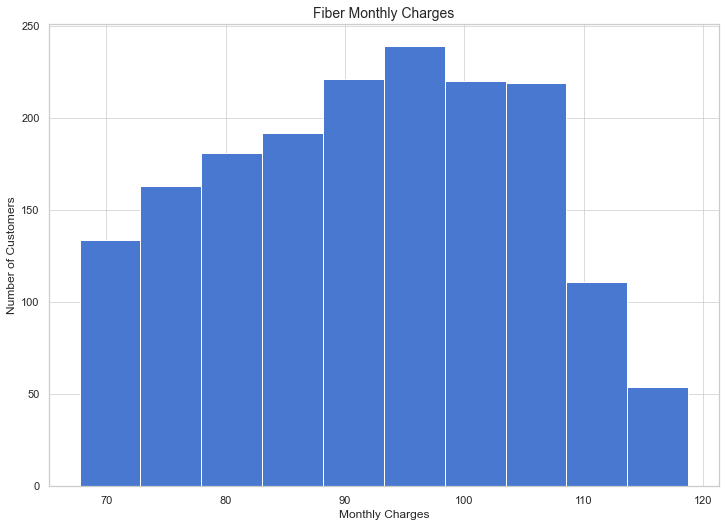

In [20]:
fiber.monthly_charges.hist()
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Fiber Monthly Charges', fontsize = 14)

Text(0.5, 1.0, 'Non-Fiber Monthly Charges')

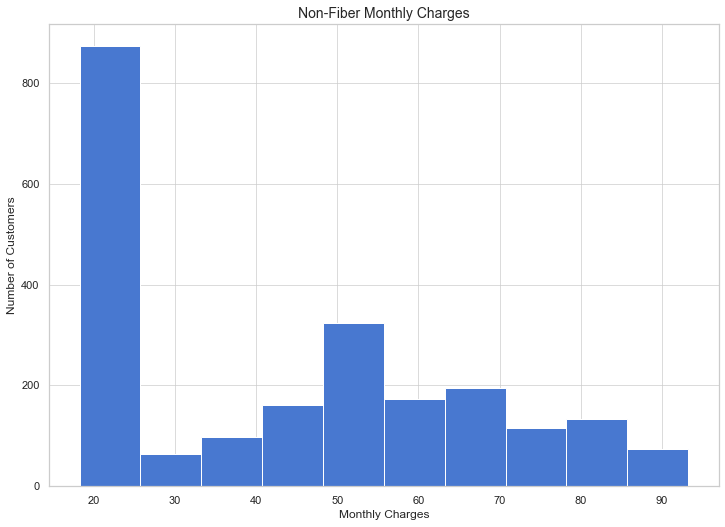

In [21]:
notfiber.monthly_charges.hist()
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Non-Fiber Monthly Charges', fontsize = 14)

In [24]:
fiber_mc = fiber.monthly_charges
notfiber_mc = notfiber.monthly_charges

In [25]:
null_hypothesis = "Monthly charges are the same for the Fiber & Non-Fiber customers."
alternative_hypothesis = "Monthly charges for Fiber & Non-Fiber customers are different."
confidence_level = .95
a = 1 - confidence_level 

In [26]:
t, p = stats.ttest_ind(fiber_mc, notfiber_mc)
t, p

(79.78925430994164, 0.0)

In [27]:
if p < a:
    print(f"We reject the null hypothesis: {null_hypothesis}")
else:
    print("We fail to reject the null hypothesis")
    print(f"Not enough evidence to support the claim: {null_hypothesis}")

We reject the null hypothesis: Monthly charges are the same for the Fiber & Non-Fiber customers.


***
### Test: M2M cust are more likely to churn than contracted customers.

In [5]:
null_hypothesis = "Contract status and churn rates are INDEPENDENT."
alternative_hypothesis = "There is a relationship between contracted customers and whether they leave TELCO."
confidence_level = .99
a = 1 - confidence_level 

In [6]:
observed2 = pd.crosstab(train.contract_m2m, train.churn)
observed2

churn,0,1
contract_m2m,,
0,1648,121
1,1249,925


In [8]:
chi2, p, degf, expected = stats.chi2_contingency(observed2)

if p < a:
    print(f"We reject the null hypothesis: {null_hypothesis}")
    print(f"Therefore: {alternative_hypothesis}")
else:
    print(f"We fail to reject the null, therefore: {null_hypothesis}")
p

We reject the null hypothesis: Contract status and churn rates are INDEPENDENT.
Therefore: There is a relationship between contracted customers and whether they leave TELCO.


2.191634229459442e-140

***
### Test: Auto billpay affects churn.

In [9]:
null_hypothesis = "Having automatic bill pay and churn rates are INDEPENDENT."
alternative_hypothesis = "There is a relationship between customers using automatic bill pay and whether they leave TELCO."
confidence_level = .99
a = 1 - confidence_level 

In [11]:
observed3 = pd.crosstab(train.auto_billpay, train.churn)
observed3

churn,0,1
auto_billpay,,
0,1408,777
1,1489,269


In [12]:
chi2, p, degf, expected = stats.chi2_contingency(observed3)

if p < a:
    print(f"We reject the null hypothesis: {null_hypothesis}")
    print(f"Therefore: {alternative_hypothesis}")
else:
    print(f"We fail to reject the null, therefore: {null_hypothesis}")
p

We reject the null hypothesis: Having automatic bill pay and churn rates are INDEPENDENT.
Therefore: There is a relationship between customers using automatic bill pay and whether they leave TELCO.


2.65321792581691e-46

___
# <a name="identify-baseline"></a>6. Identify Baseline
What is your baseline prediction? What is your baseline accuracy?

In [7]:
df.churn.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

My baseline prediction will be the mode: 0.
Which is "No Churn."

In [8]:
baseline_accuracy = (train.churn == 0).mean()
baseline_accuracy

0.7347197565305605

___
# <a name="modeling"></a>7. Modeling
Now that we've narrowed down to 4 drivers:
reset our features to only include these columns.

In [ ]:
#review what features are available
train.info()

In [ ]:
#features I want included
features = ['senior_citizen', 'tech_support', 'monthly_charges', 'intserv_dsl', 'intserv_fiber', 'contract_m2m', 'auto_billpay', 'sen_int']
#what our target is
target=['churn']

In [ ]:
# Setup our X inputs and y target variable for each split
# Our listed features will be inputted into features
X_train = train[features] 
y_train = train[target] 

X_validate = validate[features] 
y_validate = validate[target]

X_test = test[features] 
y_test = test[target]

***
# <a name="train"></a>• Train

### Decision Tree Classifier

In [7]:
# Let's generate a blank, new Decision Tree model
# Be sure to set the max_depth argument
# clf = DecisionTreeClassifier(max_depth=3, random_state=123)

clf = DecisionTreeClassifier(max_depth=3, random_state=3210)

In [8]:
# Now let's train our model on the training data
# fitting == training the model
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(max_depth=3, random_state=3210)

In [10]:
# To programmatically specify the output class labels
# Visualize the model so it can explain itself!
# dataframe.target_variable.unique() then sort the array

dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('telco_decision_tree', view=True, format="pdf")

'telco_decision_tree.pdf'

In [9]:
# Now we'll make a SET OF PREDICTIONS using this trained model
y_pred = clf.predict(X_train)
# ESTIMATE THE PROBABLITIES for each class
y_pred_proba = clf.predict_proba(X_train)

In [ ]:
#create a function to calculate the metrics
def get_metrics(mod, X, y):
    baseline_accuracy = (train.churn == 0).mean()
    y_pred = mod.predict(X)
    accuracy = mod.score(X, y)
    prfs = pd.DataFrame(precision_recall_fscore_support(y, y_pred), index=['precision', 'recall', 'f1-score', 'support'])
    
    print(f'''
    BASELINE accuracy is: {baseline_accuracy:.2%}
    The accuracy for our model is: {accuracy:.2%} 
    ''')
    return prfs

In [ ]:
get_metrics(clf, X_train, y_train)

### Random Forest 

In [14]:
#create the Random Forest object
rf = RandomForestClassifier(max_depth=3, random_state=3210)

In [15]:
rf = rf.fit(X_train, y_train)
rf

RandomForestClassifier(max_depth=3, random_state=3210)

In [16]:
# visualize the importance weight
feature_importances = pd.DataFrame(rf.feature_importances_,
                                  index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
contract_m2m,0.369925
intserv_fiber,0.191413
tech_support,0.190800
auto_billpay,0.112403
monthly_charges,0.080834
sen_int,0.029324
intserv_dsl,0.017606
senior_citizen,0.007695


In [ ]:
get_metrics(rf, X_train, y_train)

### KNN

In [19]:
# Create KNN object
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [20]:
# fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
get_metrics(knn, X_train, y_train)


    BASELINE accuracy is: 73.47%
    The accuracy for our model is: 82.04% 
    


,0,1
precision,0.860151,0.686947
recall,0.902313,0.593690
f1-score,0.880728,0.636923
support,2897.000000,1046.000000


### Logistic Regression

In [8]:
# create the object
# Define the logistic regression model
logit = LogisticRegression(C=1, random_state=3210)

In [9]:
# fit the model on train data
logit.fit(X_train, y_train)

LogisticRegression(C=1, random_state=3210)

In [10]:
get_metrics(logit, X_train, y_train)


    BASELINE accuracy is: 73.47%
    The accuracy for our model is: 77.63% 
    


,0,1
precision,0.813570,0.612329
recall,0.902313,0.427342
f1-score,0.855646,0.503378
support,2897.000000,1046.000000


***
# <a name="validate"></a>• Validate

In [11]:
get_metrics(clf, X_validate, y_validate)

NameError: name 'clf' is not defined

In [27]:
get_metrics(rf, X_validate, y_validate)


    BASELINE accuracy is: 73.47%
    The accuracy for our model is: 77.71% 
    


,0,1
precision,0.803935,0.634328
recall,0.921095,0.378619
f1-score,0.858537,0.474198
support,1242.000000,449.000000


In [28]:
get_metrics(knn, X_validate, y_validate)


    BASELINE accuracy is: 73.47%
    The accuracy for our model is: 73.98% 
    


,0,1
precision,0.813281,0.510949
recall,0.838164,0.467706
f1-score,0.825535,0.488372
support,1242.000000,449.000000


In [11]:
get_metrics(logit, X_validate, y_validate)


    BASELINE accuracy is: 73.47%
    The accuracy for our model is: 78.59% 
    


,0,1
precision,0.825444,0.628319
recall,0.898551,0.474388
f1-score,0.860447,0.540609
support,1242.000000,449.000000


***
# <a name="test"></a>• Test

In [ ]:
get_metrics(logit, X_test, y_test)

___
# <a name="predict-on-test-model"></a>8. Predict On Test Model

In [ ]:
telco = acquire.get_telco_data()

In [ ]:
telco = prepare.prep_telco(telco)

In [ ]:
telco.info()

In [ ]:
dropcols = ['customer_id', 'gender', 'tenure', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'paperless_billing', 'total_charges', 'churn', 'pymt_type_abt', 'pymt_type_acc', 'pymt_type_echk', 'pymt_type_mchk', 'contract_1yr', 'contract_2yr', 'tenure_yrs', 'phone_multi_line', 'phone_sgl_line', 'sgl_dependents', 'sgl_no_dep', 'fam_house', 'stream_media', 'online_feats', 'sen_int_techsup']

In [ ]:
telco.drop(columns= dropcols, inplace=True)

In [19]:
churn_probability = pd.DataFrame({'churn_probability': logit.predict_proba(telco)[:,1]})

In [21]:
churn_probability.head()

,churn_probability
0,0.389687
1,0.136643
2,0.456781
3,0.496568
4,0.278178


In [20]:
telco['prediction'] = logit.predict(telco)

In [23]:
churn_pred = pd.DataFrame(telco['prediction'])
churn_pred.head(2)

,prediction
0,0
1,0


___
# <a name="export-predictions-to-csv"></a>9. Export Predictions to CSV

In [21]:
customer_id = pd.DataFrame(df['customer_id'])
customer_id.head(2)

,customer_id
0,0003-MKNFE
1,0013-MHZWF


In [24]:
predictions = pd.concat([customer_id, churn_probability, churn_pred], axis =1)

In [25]:
predictions.head()

,customer_id,churn_probability,prediction
0,0003-MKNFE,0.389687,0
1,0013-MHZWF,0.136643,0
2,0015-UOCOJ,0.456781,0
3,0023-HGHWL,0.496568,0
4,0032-PGELS,0.278178,0


In [ ]:
predictions.to_csv('predictions.csv')